# To Explore Decision Tree Algorithm 

###### Intern ID Sumit Joshi

In [43]:
# Importing Libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
# Loading the iris dataset
iris = datasets.load_iris()
#forming  the iris dataframe 
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Let us visualize the decision tree to understand it better 

In [28]:
!pip install pydotplus


In [6]:
df.shape

(150, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumit joshi\anaconda3\envs\pytensor\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [19]:
df_new=df.rename(columns={'sepal length (cm)':'Sepal_Length','sepal width (cm)':'Sepal_Width',
                          'petal length (cm)':'Petal_Length','petal width (cm)':'Petal_Width'})

In [20]:
df_new.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
import seaborn as sns

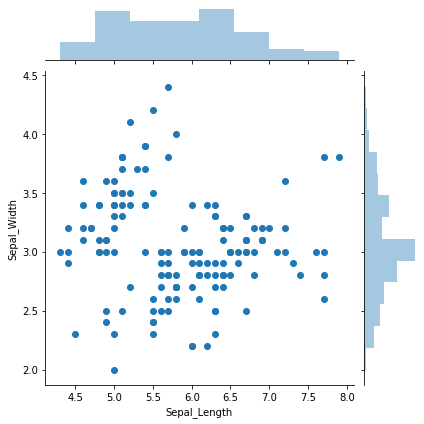

In [22]:
sns.jointplot(x='Sepal_Length',y= 'Sepal_Width', data=df_new)

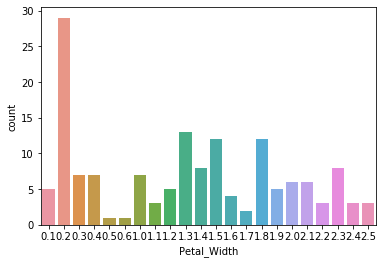

In [23]:
sns.countplot(x='Petal_Width' , data=df_new)

In [24]:
df_new.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000173FB8E3048>,
      dtype=object)

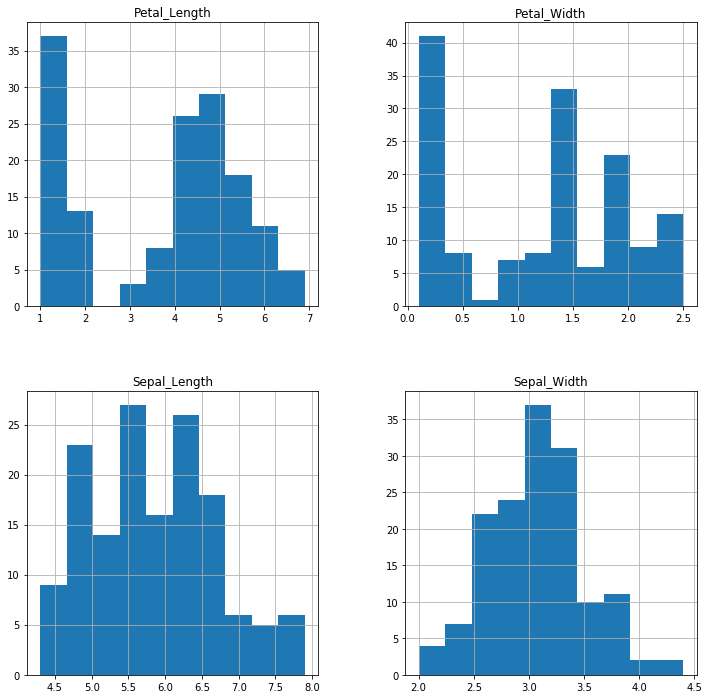

In [30]:
df_new.hist(figsize = (12,12))

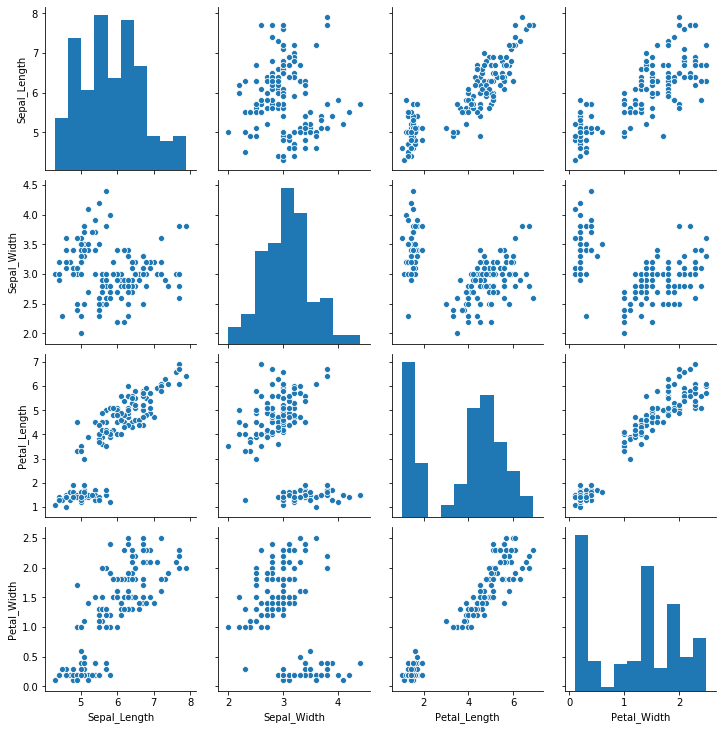

In [31]:
#pairplot of the given data 
sns.pairplot(df_new)

In [33]:
#build the model
x =df_new
y=y


In [35]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.30,random_state = 40)
print("Shape of feature training data :",x_train.shape)
print("Shape of target training data :",y_train.shape)
print("Shape of feature test data :",x_test.shape)
print("Shape of target test data :",y_test.shape)

Shape of feature training data : (105, 4)
Shape of target training data : (105,)
Shape of feature test data : (45, 4)
Shape of target test data : (45,)


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
#accuracy for testing data
predict = clf.predict(x_test)
print("accuracy of testing data :",accuracy_score(predict,y_test)*100,'%')
print("Confusin matrix of testing data :\n ",confusion_matrix(predict,y_test))

accuracy of testing data : 100.0 %
Confusin matrix of testing data :
  [[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]


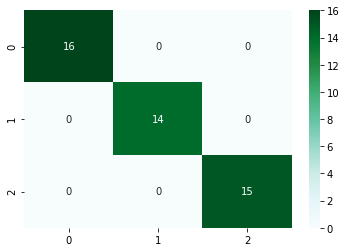

In [41]:
sns.heatmap(confusion_matrix(predict,y_test),annot = True,cmap = 'BuGn')

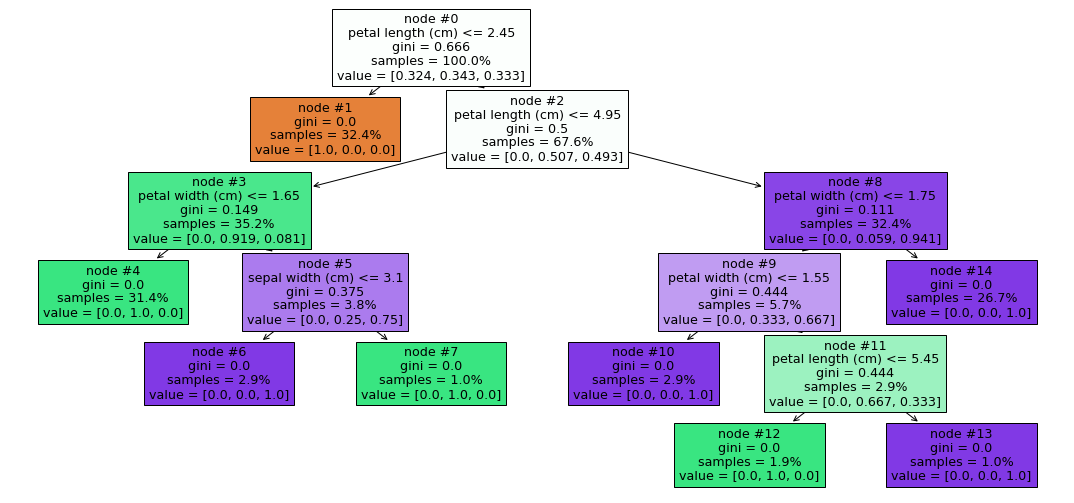

In [46]:
plt.figure(figsize =(19,9))
tree.plot_tree(clf,filled = True,proportion = True,node_ids = True,feature_names = iris.feature_names)
plt.show()